In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='ignore', category=DataConversionWarning)
# warnings.filterwarnings(action='ignore', category=DeprecationWarning)
red = pd.read_csv("data/out_binary_class.csv")

In [175]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [109]:
y.head()

,quality
0,0
1,0
2,0
3,1
4,0


In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [5]:
X_train[:5]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
381,7.6,0.51,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
717,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1
497,7.8,0.91,0.07,1.9,0.058,22.0,47.0,0.99525,3.51,0.43,10.7
967,8.0,0.60,0.22,2.1,0.080,25.0,105.0,0.99613,3.30,0.49,9.9


In [6]:
print('X_train 크기 :', X_train.shape)
print('X_test 크기 :', X_test.shape)

X_train 크기 : (908, 11)
X_test 크기 : (227, 11)


In [7]:
print('y_train 크기 :', y_train.shape)
print('y_test 크기 :', y_test.shape)

y_train 크기 : (908, 1)
y_test 크기 : (227, 1)


In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.66
pre :
[1 1 1 0 1 1 1 1 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [9]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y)
print(scores)
print('교차검증 평균점수 : {:.2f}'.format(scores.mean()))

[0.56728232 0.59102902 0.52254642]
교차검증 평균점수 : 0.56


In [10]:
from sklearn.model_selection import cross_validate
res = cross_validate(knn, X, y, return_train_score=True)
res_df = pd.DataFrame(res)
display(res_df)
print('평균 시간과 점수 : \n', res_df.mean())

,fit_time,score_time,test_score,train_score
0,0.003004,0.010996,0.567282,1.0
1,0.003000,0.011002,0.591029,1.0
2,0.003000,0.009001,0.522546,1.0


평균 시간과 점수 : 
 fit_time       0.003002
score_time     0.010333
test_score     0.560286
train_score    1.000000
dtype: float64


### 스케일러

In [132]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.74
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [12]:
X_train[:3]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
12,8.9,0.22,0.48,1.8,0.077,29.0,60.0,0.99680,3.39,0.53,9.4
381,7.6,0.51,0.24,2.4,0.091,8.0,38.0,0.99800,3.47,0.66,9.6
717,8.9,0.50,0.21,2.2,0.088,21.0,39.0,0.99692,3.33,0.83,11.1


In [13]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(X_train)
X_train_scaled = robust_scaler.transform(X_train)
X_test_scaled = robust_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.75
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [14]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = minmax_scaler.transform(X_train)
X_test_scaled = minmax_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.71
pre :
[1 0 0 0 1 1 1 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [15]:
from sklearn.preprocessing import MaxAbsScaler

maxabs_scaler = MaxAbsScaler().fit(X_train)
X_train_scaled = maxabs_scaler.transform(X_train)
X_test_scaled = maxabs_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.73
pre :
[1 0 1 0 0 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [16]:
from sklearn.preprocessing import Normalizer

normal_scaler = Normalizer().fit(X_train)
X_train_scaled = normal_scaler.transform(X_train)
X_test_scaled = normal_scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.65
pre :
[0 1 1 0 1 1 1 1 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


**standard 사용**

In [177]:
X = red.iloc[:,:-1]
y = red.iloc[:,[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train_scaled, y_train)

pre = knn.predict(X_test_scaled) 
print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test["quality"].values[:10]}')

테스트 세트의 정확도 : 0.74
pre :
[0 1 0 1 1 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [178]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(knn, random_state=42).fit(X_test_scaled, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0890 ± 0.0440,alcohol
0.0432 ± 0.0457,sulphates
0.0396 ± 0.0320,residual sugar
0.0370 ± 0.0132,total sulfur dioxide
0.0352 ± 0.0449,volatile acidity
0.0317 ± 0.0312,pH
0.0256 ± 0.0281,citric acid
0.0238 ± 0.0293,density
0.0167 ± 0.0103,free sulfur dioxide
0.0123 ± 0.0103,chlorides


**eli5 => 매번 달라짐**

#### n_neighbors = 1 선정 이유

1 0.7444933920704846
10 0.7709251101321586


n,1,2,3,4,5,6,7,8,9,10,11,12,13,14
train_uni,1.000000,0.890969,0.875551,0.839207,0.824890,0.820485,0.802863,0.785242,0.789648,0.781938,0.776432,0.770925,0.776432,0.776432
test_uni,0.744493,0.691630,0.722467,0.722467,0.704846,0.709251,0.718062,0.735683,0.713656,0.718062,0.687225,0.700441,0.687225,0.696035
train_dis,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test_dis,0.744493,0.744493,0.748899,0.762115,0.748899,0.748899,0.753304,0.766520,0.762115,0.770925,0.744493,0.740088,0.740088,0.753304


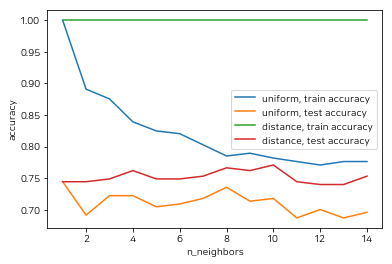

In [201]:
training_accuracy_uni = []
training_accuracy_dis = []
test_accuracy_uni = []
test_accuracy_dis = []

weights = ['uniform', 'distance']

# 1에서 10까지 n_neighbors를 적용
# 피쳐개수의 제곱근정도를 지정할때 성능이 좋은 것으로 알려짐
neighbors_settings = range(1, 15)

for n_neighbors in neighbors_settings:
    clf_uni = KNeighborsClassifier(n_neighbors=n_neighbors,
                                   weights=weights[0])
    clf_dis = KNeighborsClassifier(n_neighbors=n_neighbors,
                                   weights=weights[1])
    clf_uni.fit(X_train_scaled, y_train)
    clf_dis.fit(X_train_scaled, y_train)
    training_accuracy_uni.append(clf_uni.score(X_train_scaled, y_train))
    training_accuracy_dis.append(clf_dis.score(X_train_scaled, y_train))
    test_accuracy_uni.append(clf_uni.score(X_test_scaled, y_test))
    test_accuracy_dis.append(clf_dis.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy_uni, label="uniform, train accuracy")
plt.plot(neighbors_settings, test_accuracy_uni, label="uniform, test accuracy")
plt.plot(neighbors_settings, training_accuracy_dis, label="distance, train accuracy")
plt.plot(neighbors_settings, test_accuracy_dis, label="distance, test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(test_accuracy_uni.index(max(test_accuracy_uni)) + 1,max(test_accuracy_uni))
print(test_accuracy_dis.index(max(test_accuracy_dis)) + 1,max(test_accuracy_dis))
df_test = pd.DataFrame()
df_test['train_uni'] = training_accuracy_uni
df_test['test_uni'] = test_accuracy_uni
df_test['train_dis'] = training_accuracy_dis
df_test['test_dis'] = test_accuracy_dis
df_test['n'] = range(1,len(test_accuracy_dis)+1)
df_test.set_index(['n'], inplace=True)
df_test.transpose()

In [187]:
from sklearn.model_selection import KFold

cv = KFold()

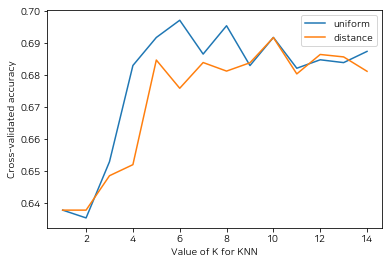

6 0.697252857036782
10 0.6918353887797601


n,1,2,3,4,5,6,7,8,9,10,11,12,13,14
uniform,0.637831,0.635392,0.652990,0.683094,0.691858,0.697253,0.686664,0.695530,0.683071,0.691882,0.682232,0.684879,0.683994,0.687503
distance,0.637831,0.637831,0.648596,0.652058,0.684802,0.675968,0.684017,0.681339,0.683948,0.691835,0.680462,0.686541,0.685779,0.681278


In [203]:
from sklearn.model_selection import cross_val_score

k_range = range(1, 15)
k_scores_uni = []
k_scores_dis = []

weights = ['uniform', 'distance']

for k in k_range:
    knn_uni = KNeighborsClassifier(n_neighbors=k, weights=weights[0])
    knn_dis = KNeighborsClassifier(n_neighbors=k, weights=weights[1])
    scores_uni = cross_val_score(knn_uni, X, y, cv = 10, scoring='accuracy')
    scores_dis = cross_val_score(knn_dis, X, y, cv = 10, scoring='accuracy')
    k_scores_uni.append(scores_uni.mean())
    k_scores_dis.append(scores_dis.mean())


    
plt.plot(k_range, k_scores_uni)
plt.plot(k_range, k_scores_dis)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.legend(['uniform', 'distance'])
plt.show()

print(k_scores_uni.index(max(k_scores_uni))+1,max(k_scores_uni))
print(k_scores_dis.index(max(k_scores_dis))+1,max(k_scores_dis))
df_test = pd.DataFrame()
df_test['uniform'] = k_scores_uni
df_test['distance'] = k_scores_dis
df_test['n'] = range(1,len(k_scores_uni)+1)
df_test.set_index(['n'], inplace=True)
df_test.transpose()

1 1.0
10 0.7709251101321586
12 0.762114537444934


n,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
train,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
train_e,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test_e,0.744493,0.744493,0.748899,0.762115,0.748899,0.748899,0.753304,0.766520,0.762115,0.770925,0.744493,0.740088,0.740088,0.753304,0.740088,0.735683,0.748899,0.757709,0.753304
train_m,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
test_m,0.722467,0.722467,0.748899,0.748899,0.744493,0.757709,0.757709,0.748899,0.722467,0.735683,0.748899,0.762115,0.753304,0.748899,0.748899,0.762115,0.744493,0.762115,0.748899


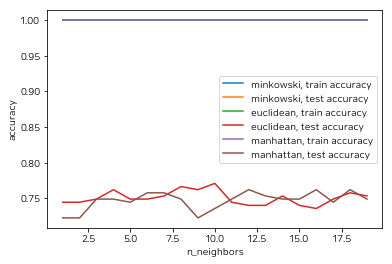

In [211]:
training_accuracy = []
training_accuracy_e = []
training_accuracy_m = []
test_accuracy = []
test_accuracy_e = []
test_accuracy_m = []

metrics = ['minkowski', 'euclidean', 'manhattan']

# 1에서 10까지 n_neighbors를 적용
# 피쳐개수의 제곱근정도를 지정할때 성능이 좋은 것으로 알려짐
neighbors_settings = range(1, 20)

for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,
                                   weights='distance', metric=metrics[0])
    clf_uni = KNeighborsClassifier(n_neighbors=n_neighbors,
                                   weights='distance', metric=metrics[1])
    clf_dis = KNeighborsClassifier(n_neighbors=n_neighbors,
                                   weights='distance', metric=metrics[2])
    clf.fit(X_train_scaled, y_train)
    clf_uni.fit(X_train_scaled, y_train)
    clf_dis.fit(X_train_scaled, y_train)
    training_accuracy.append(clf.score(X_train_scaled, y_train))
    training_accuracy_e.append(clf_uni.score(X_train_scaled, y_train))
    training_accuracy_m.append(clf_dis.score(X_train_scaled, y_train))
    test_accuracy.append(clf.score(X_train_scaled, y_train))
    test_accuracy_e.append(clf_uni.score(X_test_scaled, y_test))
    test_accuracy_m.append(clf_dis.score(X_test_scaled, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="minkowski, train accuracy")
plt.plot(neighbors_settings, test_accuracy, label="minkowski, test accuracy")
plt.plot(neighbors_settings, training_accuracy_e, label="euclidean, train accuracy")
plt.plot(neighbors_settings, test_accuracy_e, label="euclidean, test accuracy")
plt.plot(neighbors_settings, training_accuracy_m, label="manhattan, train accuracy")
plt.plot(neighbors_settings, test_accuracy_m, label="manhattan, test accuracy")
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()

print(test_accuracy.index(max(test_accuracy)) + 1,max(test_accuracy))
print(test_accuracy_e.index(max(test_accuracy_e)) + 1,max(test_accuracy_e))
print(test_accuracy_m.index(max(test_accuracy_m)) + 1,max(test_accuracy_m))
df_test = pd.DataFrame()
df_test['train'] = training_accuracy
df_test['test'] = test_accuracy
df_test['train_e'] = training_accuracy_e
df_test['test_e'] = test_accuracy_e
df_test['train_m'] = training_accuracy_m
df_test['test_m'] = test_accuracy_m
df_test['n'] = range(1,len(test_accuracy)+1)
df_test.set_index(['n'], inplace=True)
df_test.transpose()

In [214]:
# 정규화, 스케일링
data = pd.read_csv('data/out_binary_class_scaled.csv')
X = data.drop(['quality'], axis=1)
y = data['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# final params {'leaf_size': 10, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'distance'}

knn = KNeighborsClassifier(n_neighbors=13, weights='distance', metric='manhattan', n_jobs=-1, leaf_size=10)
# p -1 (맨하탄 거리 점수 더 낮음)
knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7577
pre :
[0 1 0 0 1 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [169]:
perm = PermutationImportance(knn, random_state=42).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.0943 ± 0.0448,alcohol
0.0714 ± 0.0359,volatile acidity
0.0687 ± 0.0392,residual sugar
0.0529 ± 0.0147,pH
0.0529 ± 0.0446,total sulfur dioxide
0.0511 ± 0.0234,sulphates
0.0361 ± 0.0281,free sulfur dioxide
0.0352 ± 0.0176,fixed acidity
0.0352 ± 0.0243,citric acid
0.0335 ± 0.0372,density


**모든 속성을 사용**

In [23]:
# 이 코드는 실행 안해도 됨

# tmp = eli5.explain_weights_df(perm)

# # 중요하지 않은 것들 제거
# important_cols = tmp[tmp['weight']>0.01]['feature'].map(lambda x: 
#                                                         int(x.replace('x', ''))).values
# important_cols = red.columns[important_cols].values

# X = red[important_cols]
# # X = X.drop(['chlorides', 'residual sugar'], axis=1)
# y = red['quality']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# knn = KNeighborsClassifier(n_neighbors=1)

# knn.fit(X_train_scaled, y_train)

# pre = knn.predict(X_test_scaled) 
# print(f'테스트 세트의 정확도 : {knn.score(X_test_scaled, y_test):.2f}')
# print(f'pre :\n{pre[:10]}')
# print(f'y   :\n{y_test.values[:10]}')

In [170]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
df = vif.round(1)
df.set_index(['feature'], inplace=True)
df.transpose()

feature,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
VIF Factor,6.8,2.1,3.1,1.7,1.3,1.9,2.1,6.4,3.1,1.3,3.6


In [171]:
X = X.drop(['fixed acidity'], axis=1)
vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
df = vif.round(1)
df.set_index(['feature'], inplace=True)
df.transpose()

feature,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
VIF Factor,2.1,2.9,1.6,1.3,1.9,2.1,2.9,1.4,1.3,2.6


In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

knn = KNeighborsClassifier(n_neighbors=10, weights='distance')

knn.fit(X_train, y_train)

pre = knn.predict(X_test) 
print(f'테스트 세트의 정확도 : {knn.score(X_test, y_test):.4f}')
print(f'pre :\n{pre[:10]}')
print(f'y   :\n{y_test.values[:10]}')

테스트 세트의 정확도 : 0.7401
pre :
[1 1 0 0 1 1 0 0 0 1]
y   :
[1 1 0 0 1 1 1 0 0 1]


In [27]:
from math import sqrt
from sklearn.metrics import mean_squared_error

# train data의 RMSE score
print(sqrt(mean_squared_error(y_test, pre)))

0.47861768653889236


In [141]:
X = red.iloc[:, :2]
y = red['quality']

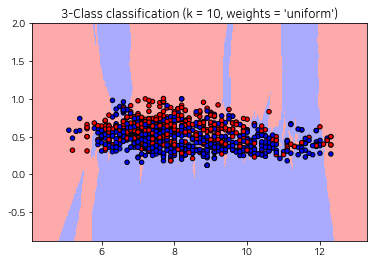

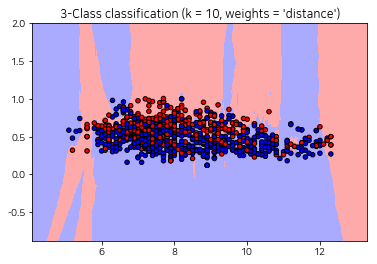

In [142]:
n_neighbors = 10

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [215]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier()
param = {'n_neighbors' : range(1, 20),
         'weights' : ['uniform', 'distance'],
         'leaf_size' : range(10, 50, 10),
         'metric' : ['euclidean', 'manhattan','minkowski'],
         'n_jobs' : [-1]
        }

gcv=GridSearchCV(model, param_grid=param, cv=cv, scoring='accuracy', n_jobs=4)

gcv.fit(X_train,y_train)

print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력
print('best score', gcv.best_score_)      # 최고의 점수

final params {'leaf_size': 10, 'metric': 'manhattan', 'n_jobs': -1, 'n_neighbors': 13, 'weights': 'distance'}
best score 0.7929515418502202
